In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster
from sktime.utils.plotting import plot_series

# = = = = = =
# own stuff

os.chdir("C:/Users/ytl_c/OneDrive/Desktop/23_24 WS (Master)/VL - PTSFC/2023_11-PTSFC")
from data_prepro import get_energy_data_today, create_dummy_df, create_features_df

In [20]:
df_energy = get_energy_data_today(to_date="20231201")
print(df_energy.info())
df_energy.tail(5)

C:\Users\ytl_c\OneDrive\Desktop\23_24 WS (Master)\VL - PTSFC\2023_11-PTSFC
0 NA in df
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78168 entries, 2014-12-31 23:00:00+00:00 to 2023-12-01 22:00:00+00:00
Freq: H
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   timestamp_CET  78168 non-null  datetime64[ns, CET]
 1   gesamt         78168 non-null  float64            
dtypes: datetime64[ns, CET](1), float64(1)
memory usage: 1.8 MB
None


,timestamp_CET,gesamt
timestamp_UTC,,
2023-12-01 18:00:00+00:00,2023-12-01 19:00:00+01:00,65481.75
2023-12-01 19:00:00+00:00,2023-12-01 20:00:00+01:00,61924.25
2023-12-01 20:00:00+00:00,2023-12-01 21:00:00+01:00,58844.75
2023-12-01 21:00:00+00:00,2023-12-01 22:00:00+01:00,56488.50
2023-12-01 22:00:00+00:00,2023-12-01 23:00:00+01:00,53533.75


In [25]:
# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =
# take smaller dataset
start   = '2016-01-01'
end     = '2023-01-01'
df_energy_small = df_energy.loc[(df_energy['timestamp_CET'] > start) & 
                                (df_energy['timestamp_CET'] <= end)]

n_total = df_energy_small.shape[0]
n_train = int(n_total * 0.8)

y_train = df_energy_small.iloc[:n_train]
y_test = df_energy_small.iloc[n_train:]

plt.plot(y_train)
plt.plot(y_test)
plt.show()

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

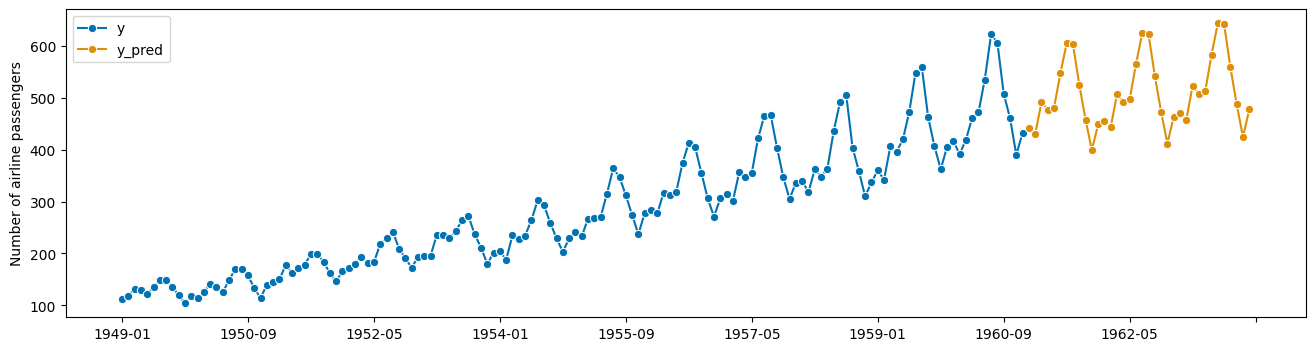

In [17]:
y = load_airline()

forecaster = ThetaForecaster(sp=12) 
forecaster.fit(y)

fh = np.arange(1, 37)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y", "y_pred"])